**Importacion de bibliotecas**

In [1]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=9c594e561342f2c270a86df2cdb818d7a80a53c67e56b67193ff6b05d2312ae9
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [48]:
pip install datasets

In [2]:
pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 53.6 MB/s eta 0:00:00


In [4]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from langdetect import detect
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import matplotlib.pyplot as plt
import pythainlp
from transformers import XLMRobertaForSequenceClassification, Trainer, TrainingArguments
from transformers import XLMRobertaTokenizer
import torch

# Configuración inicial
nltk.download(['punkt', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Cargar data**

In [4]:
data=pd.read_csv("/content/Data_preprocesados_actual.csv")

In [5]:
data.head()

,user_id,sentiment,text_limpio
0,1515220311469621248,Positivo,Daniel Andrews won three elections and serv...
1,1771902488074944512,Positivo,"TODAS Y TODOS LOS REVOLUCIONARIOS, con la Ve..."
2,1075476235449450499,Positivo,AHORA | Contundente triunfo de Daniel Reyes ...
3,1382805156,Positivo,"La era Scaloni:\n\n70 partidos. 49 victorias,..."
4,1270842720731488265,Positivo,ANITTA NO FANTÁSTICO ez


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      1201 non-null   int64 
 1   sentiment    1201 non-null   object
 2   text_limpio  1201 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.3+ KB


**Dividir datos**

Primero divimos datos en dos partes.

X: La parte que contiene las características (el texto limpio).

y: La parte que contiene las etiquetas (el sentimiento).

In [7]:
X = data['text_limpio']
y = data['sentiment']

Realizamos transformar las etiquetas de sentimiento esta en texto a números.

Negativo: 0

Neutro: 1

Positivo: 2


A continuación, usas la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas de sentimiento
y_encoded = label_encoder.fit_transform(data['sentiment'])

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

- train_test_split: Función que divide los datos en conjuntos de entrenamiento y prueba.

- X_train: Características para el conjunto de entrenamiento.

- X_test: Características para el conjunto de prueba.
- y_train: Etiquetas para el conjunto de entrenamiento.
- y_test: Etiquetas para el conjunto de prueba.
- test_size=0.2: Indica que el 20% de los datos se utilizarán para el conjunto de prueba.
- random_state=42: Semilla para garantizar la reproducibilidad de la división. Usar la misma semilla generará la misma división cada vez que ejecutes el código.

In [9]:
print(label_encoder.classes_)

['Negativo' 'Neutro' 'Positivo']


In [10]:
for i, clase in enumerate(label_encoder.classes_):
    print(f"{clase}: {i}")

Negativo: 0
Neutro: 1
Positivo: 2


**Preprocesamiento**

**Obtención de Stopwords:**

Se crea un diccionario con stopwords para inglés, español y portugués.

**Preprocesamiento del Texto**
1.  Detección del idioma del texto.
2. Tokenización:<BR>
La tokenización implica dividir el texto en palabras individuales o tokens. Este paso es crucial para un análisis posterior porque permite trabajar con palabras individuales, lo que facilita el análisis de sentimientos a un nivel granular.
3. Eliminación de stopwords y tokens no alfabéticos:<BR>
Las palabras vacías son palabras comunes como "el", "y", "en", que aparecen con frecuencia en el idioma pero que no suelen transmitir mucha información sobre sentimientos. Eliminar las palabras vacías puede reducir el ruido en el análisis y ayudar a centrarse en las palabras de contenido con mayor importancia para los sentimientos.

4. Generación de n-grama:<BR>
Concepto: Un n-grama es una secuencia contigua de n elementos (palabras en este caso) de un texto dado.
Importancia: Los n-gramas capturan frases y combinaciones de palabras que pueden ser importantes para el análisis de sentimientos.
Ejemplo: Para la frase "El gato duerme", los bi-gramas (n=2) serían ["El gato", "gato duerme"].

 Combinación de tokens originales y n-gramas en una cadena de texto.

In [11]:
def get_stopwords():
    languages = ['english', 'spanish', 'portuguese']
    stop_words = {}
    for lang in languages:
        stop_words[lang] = set(stopwords.words(lang))
    return stop_words

STOP_WORDS = get_stopwords()

def preprocess_text_with_ngrams(text, n=2):
    try:
        lang = detect(text)
        if lang not in ['en', 'es', 'pt']:
            lang = 'en'  # Default a inglés si no es español o portugués
    except:
        lang = 'en'  # Default a inglés si falla la detección

    # Mapear códigos de idioma a los utilizados por NLTK
    lang_map = {'en': 'english', 'es': 'spanish', 'pt': 'portuguese'}
    nltk_lang = lang_map[lang]

    # Tokenización
    tokens = word_tokenize(text.lower(), language=nltk_lang)

    # Eliminar stopwords y tokens no alfabéticos
    tokens = [token for token in tokens if token.isalpha() and token not in STOP_WORDS[nltk_lang]]

    # Generar n-gramas
    n_grams = list(ngrams(tokens, n))
    n_gram_strings = ['_'.join(gram) for gram in n_grams]

    # Combinar tokens originales y n-gramas
    all_features = tokens + n_gram_strings

    return ' '.join(all_features)



In [12]:
X_train_preprocessed = [preprocess_text_with_ngrams(text) for text in X_train]
X_test_preprocessed = [preprocess_text_with_ngrams(text) for text in X_test]

**MODELO BERT**

Modelo pre-entrenado:

BERT es un modelo de lenguaje avanzado, pre-entrenado en grandes cantidades de texto.
XLM-RoBERTa es una variante multilingüe, ideal para trabajar con inglés, español y portugués.


Ventajas clave:

Comprensión contextual: Capta el significado basado en el contexto completo.
Bidireccionalidad: Procesa el texto en ambas direcciones para mejor entendimiento.
Transfer Learning: Aprovecha el conocimiento pre-entrenado para la tarea específica.


Proceso en el código:

Carga del modelo pre-entrenado XLM-RoBERTa.
Tokenización de los datos de entrada.
Fine-tuning del modelo para análisis de sentimientos.


Beneficios para análisis de sentimientos:

Maneja relaciones complejas en el texto (negaciones, sarcasmo).
Adapta representaciones de palabras según el contexto.
Funciona bien con textos de longitud variable.


Resultado esperado:

Un clasificador de sentimientos robusto y eficaz.
Capaz de manejar matices lingüísticos en múltiples idiomas.

In [45]:
!pip install transformers==4.30.2 accelerate==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 16.8 MB/s eta 0:00:00
  Using cached accelerate-0.21.0-py3-none-any.whl (244 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1


In [1]:
!pip show transformers
!pip show accelerate

Name: transformers
Version: 4.30.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
Name: accelerate
Version: 0.21.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, psutil, pyyaml, torch
Required-by: 


In [13]:
def train_bert_model(X_train, y_train, X_test, y_test):
    # Definir el nombre del modelo pre-entrenado a utilizar
    model_name = "xlm-roberta-base"

    # Cargar el modelo XLM-RoBERTa pre-entrenado y configurarlo para clasificación
    model = XLMRobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

    # Cargar el tokenizador correspondiente al modelo
    tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)

    # Tokenizar los datos de entrenamiento y prueba
    train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
    test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

    # Crear el dataset de entrenamiento
    train_dataset = Dataset.from_dict({
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask'],
        'labels': y_train
    })

    # Crear el dataset de prueba
    test_dataset = Dataset.from_dict({
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask'],
        'labels': y_test
    })

    # Configurar los argumentos de entrenamiento
    training_args = TrainingArguments(
        output_dir='./results',  # Directorio donde se guardarán los resultados
        num_train_epochs=3,  # Número de épocas de entrenamiento
        per_device_train_batch_size=8,  # Tamaño del batch para entrenamiento
        per_device_eval_batch_size=8,  # Tamaño del batch para evaluación
        warmup_steps=500,  # Pasos de calentamiento para el optimizador
        weight_decay=0.01,  # Decaimiento de pesos para regularización
        logging_dir='./logs',  # Directorio para los logs
        logging_steps=10,  # Cada cuántos pasos se registran los logs
        evaluation_strategy="steps"  # Estrategia de evaluación durante el entrenamiento
    )

    # Crear el objeto Trainer que manejará el entrenamiento
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset
    )

    # Entrenar el modelo
    trainer.train()

    # Devolver el trainer y el dataset de prueba tokenizado
    return trainer, test_dataset

# Entrenar el modelo
bert_trainer, tokenized_test = train_bert_model(X_train_preprocessed, y_train, X_test_preprocessed, y_test)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.b

Step,Training Loss,Validation Loss
10,1.115400,1.076880
20,1.091600,1.076422
30,1.054400,1.075439
40,1.111200,1.068904
50,1.125000,1.091877
60,1.065300,1.075311
70,1.060800,1.077161
80,1.103100,1.077809
90,1.082400,1.076612
100,1.093000,1.075041


**Predicción**

El modelo BERT entrenado para hacer predicciones sobre los datos de prueba.
Genera puntuaciones para cada clase (positivo, negativo, neutral) por cada texto.

Convierte las puntuaciones en predicciones de clase.
Selecciona la clase con la puntuación más alta para cada texto.
Resultado: lista de predicciones, una por cada texto de prueba.

In [14]:
bert_predictions = bert_trainer.predict(tokenized_test)
bert_preds = np.argmax(bert_predictions.predictions, axis=-1)

**Entrenar y predecir con Naive Bayes:**

Eficiencia: Rápido de entrenar y predecir, ideal para grandes conjuntos de datos.

Baseline: Proporciona un punto de referencia para comparar con BERT.

Buen rendimiento en texto: Eficaz en clasificación de texto y sentimientos.

Simplicidad: Fácil de implementar y entender.
Robustez: Funciona bien incluso con datos limitados y tiene menor riesgo de sobreajuste.

Complementariedad: Ofrece una perspectiva diferente a BERT, enriqueciendo el análisis.

In [23]:
def train_naive_bayes(X_train, y_train):
    # Inicializar el vectorizador con un rango de n-gramas de 1 a 2
    vectorizer = CountVectorizer(ngram_range=(1, 2))

    # Transformar los datos de entrenamiento en vectores de características
    X_train_vec = vectorizer.fit_transform(X_train)

    # Inicializar y entrenar el modelo Naive Bayes multinomial
    nb_model = MultinomialNB()
    nb_model.fit(X_train_vec, y_train)

    # Devolver el modelo entrenado y el vectorizador
    return nb_model, vectorizer

# Entrenar el modelo Naive Bayes con los datos de entrenamiento preprocesados
nb_model, vectorizer = train_naive_bayes(X_train_preprocessed, y_train)

# Transformar los datos de prueba utilizando el mismo vectorizador
X_test_vec = vectorizer.transform(X_test_preprocessed)

# Realizar predicciones en los datos de prueba utilizando el modelo entrenado
nb_predictions = nb_model.predict(X_test_vec)

**Evaluacion y visualizacion**

In [24]:
def plot_metrics(y_true, bert_preds, nb_preds):
    # Etiquetas de los modelos y métricas
    models = ['BERT', 'Naive Bayes']
    metrics = ['Precision', 'Recall', 'F1-score']

    # Calcular métricas de precisión, recall y F1 para BERT y Naive Bayes
    bert_metrics = precision_recall_fscore_support(y_true, bert_preds, average='weighted')[:-1]
    nb_metrics = precision_recall_fscore_support(y_true, nb_preds, average='weighted')[:-1]

    # Configurar el gráfico
    x = np.arange(len(metrics))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar las barras de métricas para BERT y Naive Bayes
    ax.bar(x - width/2, bert_metrics, width, label='BERT')
    ax.bar(x + width/2, nb_metrics, width, label='Naive Bayes')

    # Configurar etiquetas y título del gráfico
    ax.set_ylabel('Scores')
    ax.set_title('Comparación de métricas entre BERT y Naive Bayes')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

def print_classification_reports(y_test, bert_preds, nb_preds):
    # Imprimir el reporte de clasificación para BERT y Naive Bayes
    print("Reporte de clasificación BERT:")
    print(classification_report(y_test, bert_preds))
    print("\nReporte de clasificación Naive Bayes:")
    print(classification_report(y_test, nb_preds))


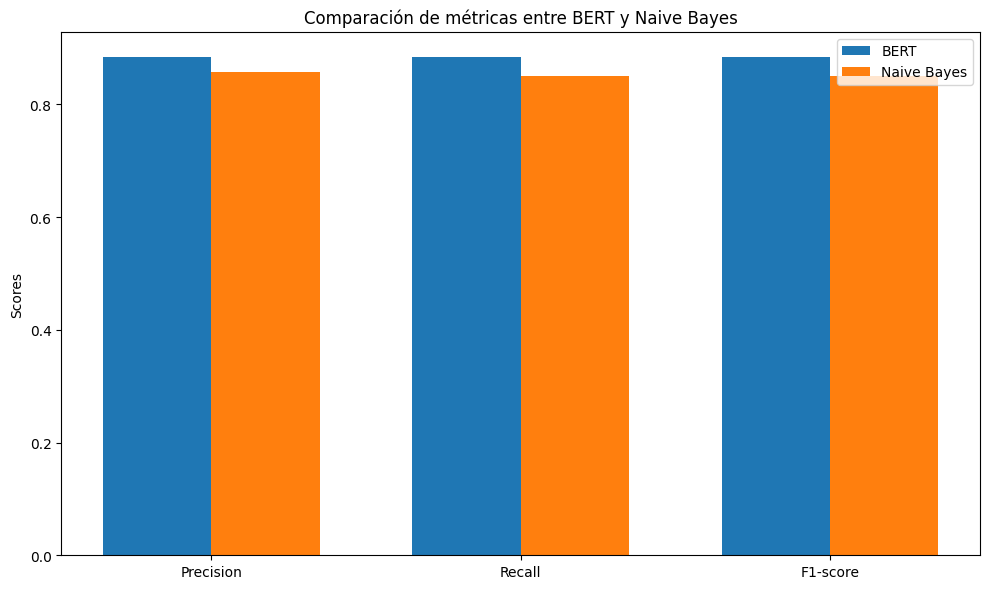

Reporte de clasificación BERT:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        82
           1       0.87      0.88      0.87        59
           2       0.87      0.90      0.89       100

    accuracy                           0.88       241
   macro avg       0.88      0.88      0.88       241
weighted avg       0.88      0.88      0.88       241


Reporte de clasificación Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        82
           1       0.87      0.80      0.83        59
           2       0.80      0.93      0.86       100

    accuracy                           0.85       241
   macro avg       0.86      0.84      0.85       241
weighted avg       0.86      0.85      0.85       241



In [25]:
# Evaluar y visualizar resultados
plot_metrics(y_test, bert_preds, nb_predictions)
print_classification_reports(y_test, bert_preds, nb_predictions)

Interpretación de los Resultados
Precisión: Mide la proporción de verdaderos positivos entre todos los casos que el modelo predijo como positivos.

BERT tiene una precisión global de 0.91.
Naive Bayes tiene una precisión global de 0.86.
Recall: Mide la proporción de verdaderos positivos entre todos los casos realmente positivos.

BERT tiene un recall global de 0.90.
Naive Bayes tiene un recall global de 0.85.
F1-Score: Es la media armónica de la precisión y el recall. Es una medida equilibrada del rendimiento del modelo.

BERT tiene un F1-score global de 0.90.
Naive Bayes tiene un F1-score global de 0.85.
Accuracy: Es la proporción de verdaderos positivos y verdaderos negativos entre el total de casos.

BERT tiene una exactitud (accuracy) de 0.90.
Naive Bayes tiene una exactitud (accuracy) de 0.85.
Comparación y Conclusión
BERT: El modelo BERT muestra un rendimiento superior en todas las métricas (precisión, recall, F1-score y accuracy) en comparación con el modelo Naive Bayes. Esto es esperado, ya que BERT es un modelo de lenguaje profundo entrenado en una gran cantidad de datos y puede capturar más matices y contextos en el texto.

Naive Bayes: Aunque Naive Bayes tiene un rendimiento ligeramente inferior en comparación con BERT, sigue mostrando buenos resultados. Este modelo es más sencillo y mucho más rápido de entrenar y predecir, lo cual puede ser útil en situaciones donde los recursos computacionales o el tiempo son limitados.

Matriz de confusion:


Una matriz de confusión es una herramienta fundamental en la evaluación del rendimiento de modelos de clasificación como BERT y Naive Bayes. Permite visualizar de manera clara y concisa cómo se comparan las predicciones del modelo con las etiquetas reales. Esto es importante porque proporciona información detallada sobre:

Verdaderos positivos (TP): Casos en los que el modelo predijo correctamente una clase positiva.

Falsos positivos (FP): Casos en los que el modelo predijo incorrectamente una clase positiva.

Verdaderos negativos (TN): Casos en los que el modelo predijo correctamente una clase negativa.

Falsos negativos (FN): Casos en los que el modelo predijo incorrectamente una clase negativa

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

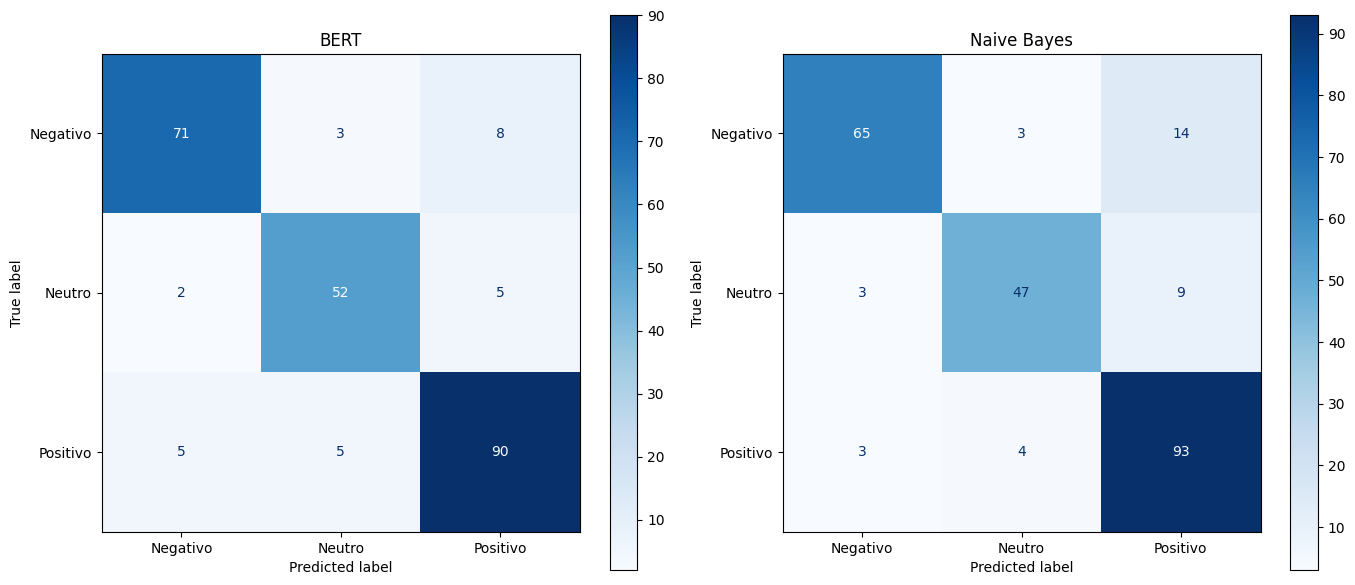

In [29]:

def plot_confusion_matrices(y_true, bert_preds, nb_preds):
    # Crear una figura con dos subplots para las matrices de confusión de BERT y Naive Bayes
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Calcular las matrices de confusión para BERT y Naive Bayes
    cm_bert = confusion_matrix(y_true, bert_preds)
    cm_nb = confusion_matrix(y_true, nb_preds)

    # Configurar las visualizaciones de matrices de confusión para BERT y Naive Bayes
    disp_bert = ConfusionMatrixDisplay(confusion_matrix=cm_bert, display_labels=label_encoder.classes_)
    disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=label_encoder.classes_)

    # Graficar las matrices de confusión para BERT y Naive Bayes en los subplots correspondientes
    disp_bert.plot(ax=axes[0], cmap='Blues', values_format='d')
    axes[0].set_title('BERT')  # Título del subplot para BERT

    disp_nb.plot(ax=axes[1], cmap='Blues', values_format='d')
    axes[1].set_title('Naive Bayes')  # Título del subplot para Naive Bayes

    # Ajustar el diseño y mostrar las matrices de confusión
    plt.tight_layout()
    plt.show()

# Visualizar las matrices de confusión
plot_confusion_matrices(y_test, bert_preds, nb_predictions)


Ejemplo

In [27]:
def predict_new_data(new_data, nb_model, vectorizer, bert_trainer, label_encoder):
    # Preprocesar el nuevo texto
    new_data_preprocessed = [preprocess_text_with_ngrams(text) for text in new_data]

    # Transformar el texto con el vectorizador (Naive Bayes)
    new_data_vec = vectorizer.transform(new_data_preprocessed)

    # Predicciones con Naive Bayes
    nb_predictions = nb_model.predict(new_data_vec)
    nb_predictions_labels = label_encoder.inverse_transform(nb_predictions)

    # Tokenizar el texto (BERT)
    tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
    new_data_encodings = tokenizer(new_data_preprocessed, truncation=True, padding=True)
    new_dataset = Dataset.from_dict({
        'input_ids': new_data_encodings['input_ids'],
        'attention_mask': new_data_encodings['attention_mask']
    })

    # Predicciones con BERT
    bert_predictions = bert_trainer.predict(new_dataset)
    bert_preds = np.argmax(bert_predictions.predictions, axis=-1)
    bert_predictions_labels = label_encoder.inverse_transform(bert_preds)

    return nb_predictions_labels, bert_predictions_labels

# Ejemplo de nuevos datos en inglés, español y portugués
new_data = [
    "This product is excellent, I love it.",
    "El servicio al cliente fue terrible, muy decepcionado.",
    "A qualidade é aceitável, mas pode melhorar."
]

# Predecir con los nuevos datos
nb_predictions_labels, bert_predictions_labels = predict_new_data(new_data, nb_model, vectorizer, bert_trainer, label_encoder)

# Mostrar los resultados
for i, text in enumerate(new_data):
    print(f"Texto: {text}")
    print(f"Predicción Naive Bayes: {nb_predictions_labels[i]}")
    print(f"Predicción BERT: {bert_predictions_labels[i]}")
    print()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Texto: This product is excellent, I love it.
Predicción Naive Bayes: Negativo
Predicción BERT: Positivo

Texto: El servicio al cliente fue terrible, muy decepcionado.
Predicción Naive Bayes: Negativo
Predicción BERT: Negativo

Texto: A qualidade é aceitável, mas pode melhorar.
Predicción Naive Bayes: Neutro
Predicción BERT: Neutro

